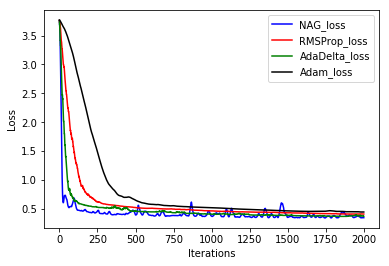

In [1]:
# write your code here
# -*- coding: utf-8 -*-

from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

#获取数据
def get_data(f):
    data = load_svmlight_file(f,123)
    return data[0], data[1]

#定义sigmoid函数
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

#NAG
def SGD_NAG(x_train, y_train, x_test, y_test, alpha, r, theta, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    v = np.zeros((123, 1))
    loss = []
    h = sigmoid(x_test * theta)
    L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
    L = -L / m
    loss.append(L[0, 0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        h = sigmoid(x_train[randIndex] * (theta - r * v))  #对应位置相乘再相加,也可写成sum(x[randIndex]*theta)
        #计算错误率
        error = h - y_train[randIndex, 0]
        #计算梯度
        G = x_train[randIndex].T * error
        #更新动量
        v = r * v + alpha * G
        #更新参数
        theta = theta - v
        
        h = sigmoid(x_test * theta)
        L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
        L = -L / m
        loss.append(L[0, 0])
    return theta, loss

#RMSProp
def SGD_RMSProp(x_train, y_train, x_test, y_test, alpha, r, theta, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G = np.zeros((123, 1))
    loss = []
    h = sigmoid(x_test * theta)
    L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
    L = -L / m
    loss.append(L[0, 0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        h = sigmoid(x_train[randIndex] * theta)  #对应位置相乘再相加,也可写成sum(x[randIndex]*theta)
        #计算错误率
        error = h - y_train[randIndex, 0]
        #计算梯度
        g = x_train[randIndex].T * error
        G = r * G + (1 - r) * (g * g)
        #更新参数
        theta = theta - (alpha / np.sqrt(G + pow(1, -8))) * g
        
        h = sigmoid(x_test * theta)
        L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
        L = -L / m
        loss.append(L[0, 0])
    return theta, loss

#AdaDelta
def SGD_AdaDelta(x_train, y_train, x_test, y_test, r, theta, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G = np.zeros((123, 1))
    t = np.zeros((123, 1))
    e = np.zeros((123, 1))
    loss = []
    h = sigmoid(x_test * theta)
    L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
    L = -L / m
    loss.append(L[0, 0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        h = sigmoid(x_train[randIndex] * theta)  #对应位置相乘再相加,也可写成sum(x[randIndex]*theta)
        #计算错误率
        error = h - y_train[randIndex, 0]
        #计算梯度
        g = x_train[randIndex].T * error
        G = r * G + (1 - r) * (g * g)
        e = -(np.sqrt(t + pow(1, -6)) / np.sqrt(G + pow(1, -6))) * g
        #更新参数
        theta = theta + e / 50
        t = r * t + (1 - r) * (e * e)
        
        h = sigmoid(x_test * theta)
        L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
        L = -L / m
        loss.append(L[0, 0])
    return theta, loss

#Adam
def SGD_Adam(x_train, y_train, x_test, y_test, alpha, r, b, theta, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G = np.zeros((123, 1))
    mom = np.zeros((123, 1))
    loss = []
    a = 0
    h = sigmoid(x_test * theta)
    L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
    L = -L / m
    loss.append(L[0, 0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        h = sigmoid(x_train[randIndex] * theta)  #对应位置相乘再相加,也可写成sum(x[randIndex]*theta)
        #计算错误率
        error = h - y_train[randIndex, 0]
        #计算梯度
        g = x_train[randIndex].T * error
        mom = b * mom + (1 - b) * g
        G = r * G + (1 - r) * (g * g)
        a = alpha * np.sqrt(1 - pow(r, i+1)) / (1 - pow(b, i+1))
        #更新参数
        theta = theta - a * (mom / np.sqrt(G + pow(1, -8)))
        
        h = sigmoid(x_test * theta)
        L = np.dot(y_test.transpose(), np.log(h)) + np.dot((1 - y_test).transpose(), np.log(1 - h))
        L = -L / m
        loss.append(L[0, 0])
    return theta, loss

#获取数据
X_train, y_train = get_data('G:\MLcode\data\\a9a.txt')
X_test, y_test = get_data('G:\MLcode\data\\a9a.t')
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
for i in range(y_train.shape[0]):
    if y_train[i, 0] < 0:
        y_train[i, 0] = 0
for i in range(y_test.shape[0]):
    if y_test[i, 0] < 0:
        y_test[i, 0] = 0

#随机初始化模型参数
W = np.random.rand(123, 1)

NAG_w, NAG_loss= SGD_NAG(X_train, y_train, X_test, y_test, 0.01, 0.9, W, 2000)
RMSProp_w, RMSProp_loss= SGD_RMSProp(X_train, y_train, X_test, y_test, 0.01, 0.9, W, 2000)
AdaDelta_w, AdaDelta_loss= SGD_AdaDelta(X_train, y_train, X_test, y_test, 0.95, W, 2000)
Adam_w, Adam_loss= SGD_Adam(X_train, y_train, X_test, y_test, 0.01, 0.999, 0.9, W, 2000)

plt.xlabel('Iterations')
plt.ylabel('Loss')
a, = plt.plot(NAG_loss, color = 'blue')
b, = plt.plot(RMSProp_loss, color = 'red')
c, = plt.plot(AdaDelta_loss, color = 'green')
d, = plt.plot(Adam_loss, color = 'black')
plt.legend(handles = [a, b, c, d], labels = ['NAG_loss', 'RMSProp_loss', 'AdaDelta_loss', 'Adam_loss'], loc = 'best')
plt.show()
